In [2]:
"""
So Lets import some use full libraries
"""
import pandas as pd
import numpy as np

In [5]:
# Read the dataset 
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 30)

In [7]:
"""
Here you can see, the dataset has 284807 records in it.
Each record has 30 features out of which "Class variable" is our target variable.
its a binary classification problem as Class Variables [0,1]
which signifies that 0 means normal transaction and 1 means Fraud transaction
"""
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

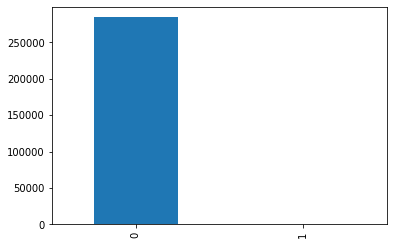

In [10]:
"""
Here you can see that,
Class 0 has 284315 records
Class 1 has 492 records 
which clearly shows that we have imbalanced dataset
lets see in graphical form
"""
pd.value_counts(data['Class']).plot.bar()

In [12]:
"""
So now its purely an imbalanced dataset.
Here are 2 ways to deal with this as follows:
W1: We can create ANN and solve the problem
W2: We can apply a weight handling techniques.
So lets divide the dataset into dependent and independent dataset
"""
X = data.iloc[:,1:30]
Y = data.iloc[:,-1]

In [13]:
X.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62


In [14]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
"""
Now we have to split our dataset into training and testing dataset
taking 30% for testing and some random state 
"""
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=43)


In [17]:
Y_train.value_counts()

0    199022
1       342
Name: Class, dtype: int64

In [18]:
# Apply Way 1: Create ANN
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [20]:
# Checking how many features we are providing 
print("Features:",len(X_train.columns))
n_inputs = len(X_train.columns)

Features: 29


In [26]:
# Defining models 
model = Sequential()
# first hidden layer
model.add(Dense(50,input_dim = n_inputs, activation="relu", kernel_initializer="he_uniform"))
# output layer
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0241
Epoch 2/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0203
Epoch 3/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0107: 0s
Epoch 4/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0159
Epoch 5/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0095
Epoch 6/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0135
Epoch 7/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0090
Epoch 8/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0100
Epoch 9/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0093
Epoch 10/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0087


In [27]:
"""
As this is class imbalanced problem so we are using ROC AUC Curves as Accuracy metrics
"""
from sklearn.metrics import roc_auc_score
Y_pred = model.predict(X_test)
print(roc_auc_score(Y_test, Y_pred))

0.9181524470550533


In [ ]:
"""
Apply Way 2 
1. Define weights 
2. apply ANN
""" 

In [28]:
"""
Here is the calculation:
Class 0 has 284315 records
Class 1 has 492 records 
#oftimesmore = 284315/492 = 577.89
So Class0 records are 577.89 times more than Class1 records
"""
weights = {0:1,1:577}

In [30]:
# Defining models 
model = Sequential()
# first hidden layer
model.add(Dense(50,input_dim = n_inputs, activation="relu", kernel_initializer="he_uniform"))
# output layer
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")
model.fit(X_train,Y_train,class_weight = weights,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 11s 2ms/step - loss: 2.7074
Epoch 2/10
6231/6231 [==============================] - 12s 2ms/step - loss: 3.0370
Epoch 3/10
6231/6231 [==============================] - 15s 2ms/step - loss: 1.6041
Epoch 4/10
6231/6231 [==============================] - 11s 2ms/step - loss: 1.8265
Epoch 5/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.4037
Epoch 6/10
6231/6231 [==============================] - 14s 2ms/step - loss: 2.2847
Epoch 7/10
6231/6231 [==============================] - 11s 2ms/step - loss: 2.2906
Epoch 8/10
6231/6231 [==============================] - 11s 2ms/step - loss: 2.1255
Epoch 9/10
6231/6231 [==============================] - 11s 2ms/step - loss: 2.2689
Epoch 10/10
6231/6231 [==============================] - 11s 2ms/step - loss: 3.0771


In [31]:
Y_pred = model.predict(X_test)
print(roc_auc_score(Y_test, Y_pred))

0.9676073065785
